<a href="https://colab.research.google.com/github/mdkamrulhasan/machine_learning_concepts/blob/master/notebooks/supervised/Classification_DNA_seq.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

What will we cover today ?


1.   Four models:

 *   Logistic Rregression (LR)
 *   Random Forest (RF)
 *   Support Vectror Classification (SVR)
 *   Boosting
 *   Naive Bayes


In [ ]:
import numpy as np
import pandas as pd
# Models (Sklearn)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# Data and Evaluation packages
from sklearn import datasets
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
# visualization
import plotly.express as px

[Data description](https://www.kaggle.com/code/satyanarayanam/dna-sequencing/input)

In [ ]:
data_url_human = "https://raw.githubusercontent.com/mdkamrulhasan/data_mining_kdd/main/data/genome/human.txt"
data_url_chimpanzee = "https://raw.githubusercontent.com/mdkamrulhasan/data_mining_kdd/main/data/genome/chimpanzee.txt"
data_url_dog = "https://raw.githubusercontent.com/mdkamrulhasan/data_mining_kdd/main/data/genome/dog.txt"

In [ ]:
human_data = pd.read_table(data_url_human)
chimp_data = pd.read_table(data_url_chimpanzee)
dog_data = pd.read_table(data_url_dog)
human_data.head()

,sequence,class
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,3


In [ ]:
def getKmers(sequence, size=6):
    return [sequence[x:x+size].lower() for x in range(len(sequence) - size + 1)]

In [ ]:
mySeq = 'GTGCCCAGGTT'
getKmers(mySeq, size=5)

['gtgcc', 'tgccc', 'gccca', 'cccag', 'ccagg', 'caggt', 'aggtt']

In [ ]:
human_data['words'] = human_data.apply(lambda x: getKmers(x['sequence']), axis=1)
human_data = human_data.drop('sequence', axis=1)
chimp_data['words'] = chimp_data.apply(lambda x: getKmers(x['sequence']), axis=1)
chimp_data = chimp_data.drop('sequence', axis=1)
dog_data['words'] = dog_data.apply(lambda x: getKmers(x['sequence']), axis=1)
dog_data = dog_data.drop('sequence', axis=1)

In [ ]:
human_data.head()

,class,words
0,4,"[atgccc, tgcccc, gcccca, ccccaa, cccaac, ccaac..."
1,4,"[atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa..."
2,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
3,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
4,3,"[atgcaa, tgcaac, gcaaca, caacag, aacagc, acagc..."


In [ ]:
human_texts = list(human_data['words'])
for item in range(len(human_texts)):
    human_texts[item] = ' '.join(human_texts[item])
# class labels
y_human = human_data.iloc[:, 0].values

In [ ]:
y_human

array([4, 4, 3, ..., 6, 6, 6])

<Axes: xlabel='class'>

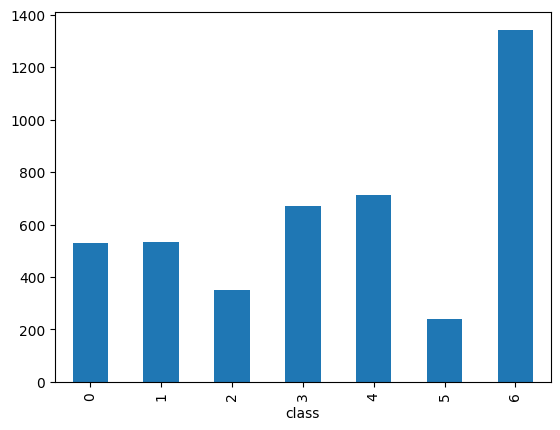

In [ ]:
human_data['class'].value_counts().sort_index().plot.bar()

In [ ]:
chimp_texts = list(chimp_data['words'])
for item in range(len(chimp_texts)):
    chimp_texts[item] = ' '.join(chimp_texts[item])
y_chimp = chimp_data.iloc[:, 0].values
dog_texts = list(dog_data['words'])
for item in range(len(dog_texts)):
    dog_texts[item] = ' '.join(dog_texts[item])
y_dog = dog_data.iloc[:, 0].values

Count vectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(1,1))
cv.fit(human_texts + chimp_texts + dog_texts)

CountVectorizer()

In [ ]:
X_human = cv.transform(human_texts)
X_chimp = cv.transform(chimp_texts)
X_dog = cv.transform(dog_texts)

In [ ]:
X_human.shape

(4380, 4556)

In [ ]:
X_human[0]

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 183 stored elements and shape (1, 4556)>

# Classification experiment for a specific class

In [ ]:
X = X_human
y = y_human

## Unique y values (i.e the labels)

In [ ]:
set(y)

{np.int64(0),
 np.int64(1),
 np.int64(2),
 np.int64(3),
 np.int64(4),
 np.int64(5),
 np.int64(6)}

## (80-20) % Train-Test splits

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

## Training and Testing a LR model

In [ ]:
# Create logistic regression object
clf = LogisticRegression()
# Train the model using the training set
clf.fit(X_train, y_train)

LogisticRegression()

Regression model parameters

In [ ]:
# Make predictions using the testing set
y_pred = clf.predict(X_test)
# The mean squared error
print("accuracy: %.2f" % accuracy_score(y_test, y_pred))

accuracy: 0.91


## Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

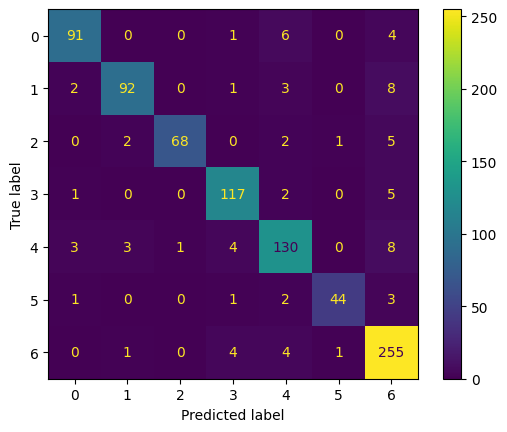

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
plt.show()

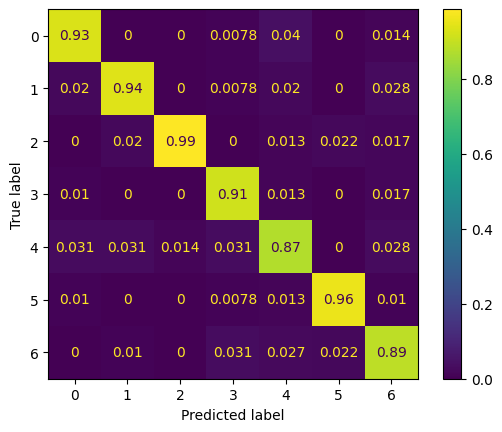

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm/cm.sum(axis=0),
                              display_labels=clf.classes_)
disp.plot()
plt.show()

## Random splitting

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3504, 16951), (3504,), (876, 16951), (876,))

## Our Wrapper Class (Can take any model as an input)

In [ ]:
from sklearn.model_selection import cross_val_score

class myClassificationModel:
  def __init__(self, model):
    self.model = model
    self.nb_cv_splits = 3
    self.evaluation_metrics = 'accuracy' #'f1'

  def train(self, X, y):
    self.model.fit(X, y)

  def evaluate(self, X, y):
    y_predict = self.model.predict(X)
    # return mean_squared_error(y, y_predict)
    return accuracy_score(y, y_predict)

  def cv_error(self, X, y):
    return cross_val_score(self.model,
                           X,
                           y, scoring=self.evaluation_metrics,
                           cv=self.nb_cv_splits)



## Logistic Regression (LR)

In [ ]:
my_model = myClassificationModel(LogisticRegression())
my_model.train(X_train, y_train)
print('train-error', my_model.evaluate(X_train, y_train))
print('test-error', my_model.evaluate(X_test, y_test))

train-error 0.9997146118721462
test-error 0.930365296803653


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
cv_scores = my_model.cv_error(X, y)
print('cross validation scores:', cv_scores)
print('cross validation score (mean):', np.mean(cv_scores))
print('cross validation score (std):', np.std(cv_scores))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

cross validation scores: [0.52534247 0.54589041 0.62328767]
cross validation score (mean): 0.5648401826484019
cross validation score (std): 0.04217136630792738


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Random Forest (RF)

In [ ]:
my_model = myClassificationModel(RandomForestClassifier())
my_model.train(X_train, y_train)
print('train-error', my_model.evaluate(X_train, y_train))
print('test-error', my_model.evaluate(X_test, y_test))

train-error 1.0
test-error 0.8858447488584474


In [ ]:
cv_scores = my_model.cv_error(X, y)
print('cross validation scores:', cv_scores)
print('cross validation score (mean):', np.mean(cv_scores))
print('cross validation score (std):', np.std(cv_scores))

cross validation scores: [0.44520548 0.43630137 0.53287671]
cross validation score (mean): 0.4714611872146119
cross validation score (std): 0.043579206323497814


## Support Vector Classifier (SVC)

In [ ]:
my_model = myClassificationModel(SVC())
my_model.train(X_train, y_train)
print('train-error', my_model.evaluate(X_train, y_train))
print('test-error', my_model.evaluate(X_test, y_test))

train-error 0.91837899543379
test-error 0.8424657534246576


In [ ]:
cv_scores = my_model.cv_error(X, y)
print('cross validation scores:', cv_scores)
print('cross validation score (mean):', np.mean(cv_scores))
print('cross validation score (std):', np.std(cv_scores))

KeyboardInterrupt: ignored

## Boosting

In [ ]:
my_model = myClassificationModel(GradientBoostingClassifier())
my_model.train(X_train, y_train)
print('train-error', my_model.evaluate(X_train, y_train))
print('test-error', my_model.evaluate(X_test, y_test))

In [ ]:
cv_scores = my_model.cv_error(X, y)
print('cross validation scores:', cv_scores)
print('cross validation score (mean):', np.mean(cv_scores))
print('cross validation score (std):', np.std(cv_scores))

## Naive Bayes

In [ ]:
my_model = myClassificationModel(GaussianNB())
my_model.train(X_train, y_train)
print('train-error', my_model.evaluate(X_train, y_train))
print('test-error', my_model.evaluate(X_test, y_test))

In [ ]:
cv_scores = my_model.cv_error(X, y)
print('cross validation scores:', cv_scores)
print('cross validation score (mean):', np.mean(cv_scores))
print('cross validation score (std):', np.std(cv_scores))